In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from gaussian_mixture_grid import GaussianMixtureGrid
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML, Image

# Gaussian Mixture Grid

## The Distributions

In [5]:
gr3d = GaussianMixtureGrid(3, 3, 3, 0.33)
rejection_efficiency = gr3d.rejection_sample_bounding_box(10000)[0].shape[0]/10000
rejection_efficiency

0.0304

In that case we don't converge! So the teleportation actually helps a lot.

In [6]:
tele_trace = gr3d.mh_with_teleportation(
  initial_value=np.array([0,0,0]),
  proposal=lambda x: np.random.multivariate_normal(x, np.identity(3)*gr3d.stddev),
  num_samples=10000,
  teleprob=rejection_efficiency*2)

tele_trace0 = gr3d.mh_with_teleportation(
  initial_value=np.array([0,0,0]),
  proposal=lambda x: np.random.multivariate_normal(x, np.identity(3)*gr3d.stddev),
  num_samples=10000,
  teleprob=0)

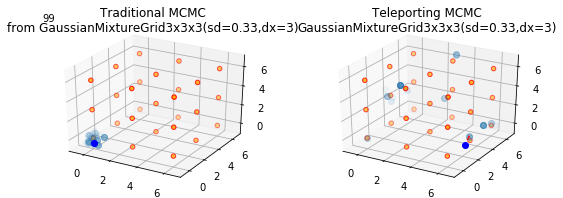

In [19]:
# Set up axis

fig = plt.figure(figsize=(12,4))
r_ax = fig.add_subplot(122, projection='3d')
r_ax.set_title('Teleporting MCMC\n{}'.format(gr3d))

Xu, Yu, Zu = gr3d.means.T
r_ax.scatter(Xu, Yu, zs=Zu, c='orange', edgecolors='r')
r_ax.set_zlim(-1,7)
r_ax.set_xlim(-1,7)
r_ax.set_ylim(-1,7)

l_ax = fig.add_subplot(121, projection='3d')
l_ax.set_title('Traditional MCMC\nfrom {}'.format(gr3d))
l_ax.scatter(Xu, Yu, zs=Zu, c='orange', edgecolors='r')

l_ax.set_zlim(-1,7)
l_ax.set_xlim(-1,7)
l_ax.set_ylim(-1,7)

r_scat, = r_ax.plot([],[],[], linestyle='', marker='o',alpha=.05)
l_scat, = l_ax.plot([],[],[], linestyle='', marker='o',alpha=.05)

#Setup lines
r_line, = r_ax.plot([],[],[], ls='dashed',c ='r',alpha=.85)
r_head, = r_ax.plot([],[],[], linestyle='',c='b',marker='o')

#l_line, = l_ax.plot([],[],[], ls='dotted',alpha=.75)
l_head, = l_ax.plot([],[],[], linestyle='',c='b',marker='o')

frame_marker = l_ax.text(-2, -2,12,'')


# initialization function: plot the background of each frame
def init():
    r_line.set_data([], [])
    r_line.set_3d_properties([])
    r_head.set_data([], [])
    r_head.set_3d_properties([])
    r_head.set_data([], [])
    r_scat.set_3d_properties([])

    #l_line.set_data([], [])
    #l_line.set_3d_properties([])
    l_head.set_data([], [])
    l_head.set_3d_properties([])
    l_scat.set_data([], [])
    l_scat.set_3d_properties([])

    frame_marker.set_text('initial')
    #return [frame_marker,r_line, r_head,r_scat,l_line, l_head,l_scat,]
    return [frame_marker,r_line, r_head, r_scat, l_head,l_scat,]

def animate(i):
    print(i,end='\r')

    frame_marker.set_text(str(i))
    #left
    Xs, Ys, Zs = tele_trace[0][max(0,i-10):i].T
    r_line.set_data(Xs[:9], Ys[:9])
    r_line.set_3d_properties(Zs[:9])

    r_head.set_data(Xs[-1:], Ys[-1:])
    r_head.set_3d_properties(Zs[-1:])

    Xs, Ys, Zs = tele_trace[0][:i].T
    r_scat.set_data(Xs, Ys)
    r_scat.set_3d_properties(Zs)


    #right
    Xs, Ys, Zs = tele_trace0[0][max(0,i-10):i].T
    #l_line.set_data(Xs[:9], Ys[:9])
    #l_line.set_3d_properties(Zs[:9])

    l_head.set_data(Xs[-1:], Ys[-1:])
    l_head.set_3d_properties(Zs[-1:])

    Xs, Ys, Zs = tele_trace0[0][:i].T
    l_scat.set_data(Xs, Ys)
    l_scat.set_3d_properties(Zs)

    #return [frame_marker,r_line, r_head,r_scat,l_line, l_head,l_scat,]
    return [frame_marker,r_line, r_head, r_scat, l_head,l_scat,]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)



anim.save('mcmc_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
#anim.save('mcmc_animation.gif', writer='imagemagick', fps=30, extra_args=['-fuzz 10%', '-layers Optimize'])



plt.show()

In [24]:
# Worked better to convert with http://www.online-convert.com/
Image(url="mcmc_animation.gif")